# Plot results from Mangino et al.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig_dir = "/data/srlab/lrumker/MCSC_Project/cna-qtl/figs/"

# From Okabe & Ito, "colorblind-friendly" palette 
from matplotlib.colors import LinearSegmentedColormap
color_dict = {'orange': '#E69F00', 'skyblue': '#56B4E9', 'green': '#009E73', 
              'yellow': '#F0E442', 'purple': '#CC79A7', 'oceanblue': '#0072B2', 
              'vermillion': '#E63d00'} # O&I use '#D55E00'

In [2]:
# Import supp table 1 from this publication
res = pd.read_csv("/data/srlab/lrumker/MCSC_Project/cna-qtl/prev_publications/Mangino_SubbTable1.csv")

In [3]:
res.shape[0] # Number of total traits

23005

In [4]:
res["New Name"].value_counts() # All trait categories

CD8 Differentiation    4313
B Memory (CD5-)        3736
CD4 Differentiation    3468
Monocytes              3101
NK Cells               2663
gd T cells             1672
B Naive (CD5-)         1099
CD8 Activation          689
B1 Cells                671
CD4 Activation          613
CD4 Polarization        492
Treg Cells              222
NKT Cells               187
Dendritic Cells          79
Name: New Name, dtype: int64

In [5]:
# Split traits by major cell type
res_NK = res.loc[res["New Name"]=="NK Cells",:]

M_labels = ['Monocytes', 'Dendritic Cells']
found_M = [res['New Name'].values[i] in M_labels for i in np.arange(res.shape[0])]
res_M = res.loc[found_M,:]

B_labels = ['B Memory (CD5-)', 'B Naive (CD5-)', 'B1 Cells']
found_B = [res['New Name'].values[i] in B_labels for i in np.arange(res.shape[0])]
res_B = res.loc[found_B,:]

T_labels = ['CD8 Differentiation', 'CD4 Differentiation', 'gd T cells', 'CD8 Activation',
           'CD4 Activation', 'CD4 Polarization', 'Treg Cells', 'NKT Cells']
found_T = [res['New Name'].values[i] in T_labels for i in np.arange(res.shape[0])]
res_T = res.loc[found_T,:]

In [6]:
# Remove traits with no heritability estimate (because best-fit model did not include genetic information)
res_NK = res_NK.loc[res_NK.A !='X',:]
res_NK['A'] = res_NK.A.astype(float)
res_T = res_T.loc[res_T.A !='X',:]
res_T['A'] = res_T.A.astype(float)
res_B = res_B.loc[res_B.A !='X',:]
res_B['A'] = res_B.A.astype(float)
res_M = res_M.loc[res_M.A !='X',:]
res_M['A'] = res_M.A.astype(float)

In [7]:
# To match Fig. 1 from this publication we remove traits with estimated heritability <60%
res_T = res_T.loc[res_T.A>=0.6,]
res_NK = res_NK.loc[res_NK.A>=0.6,]
res_B = res_B.loc[res_B.A>=0.6,]
res_M = res_M.loc[res_M.A>=0.6,]

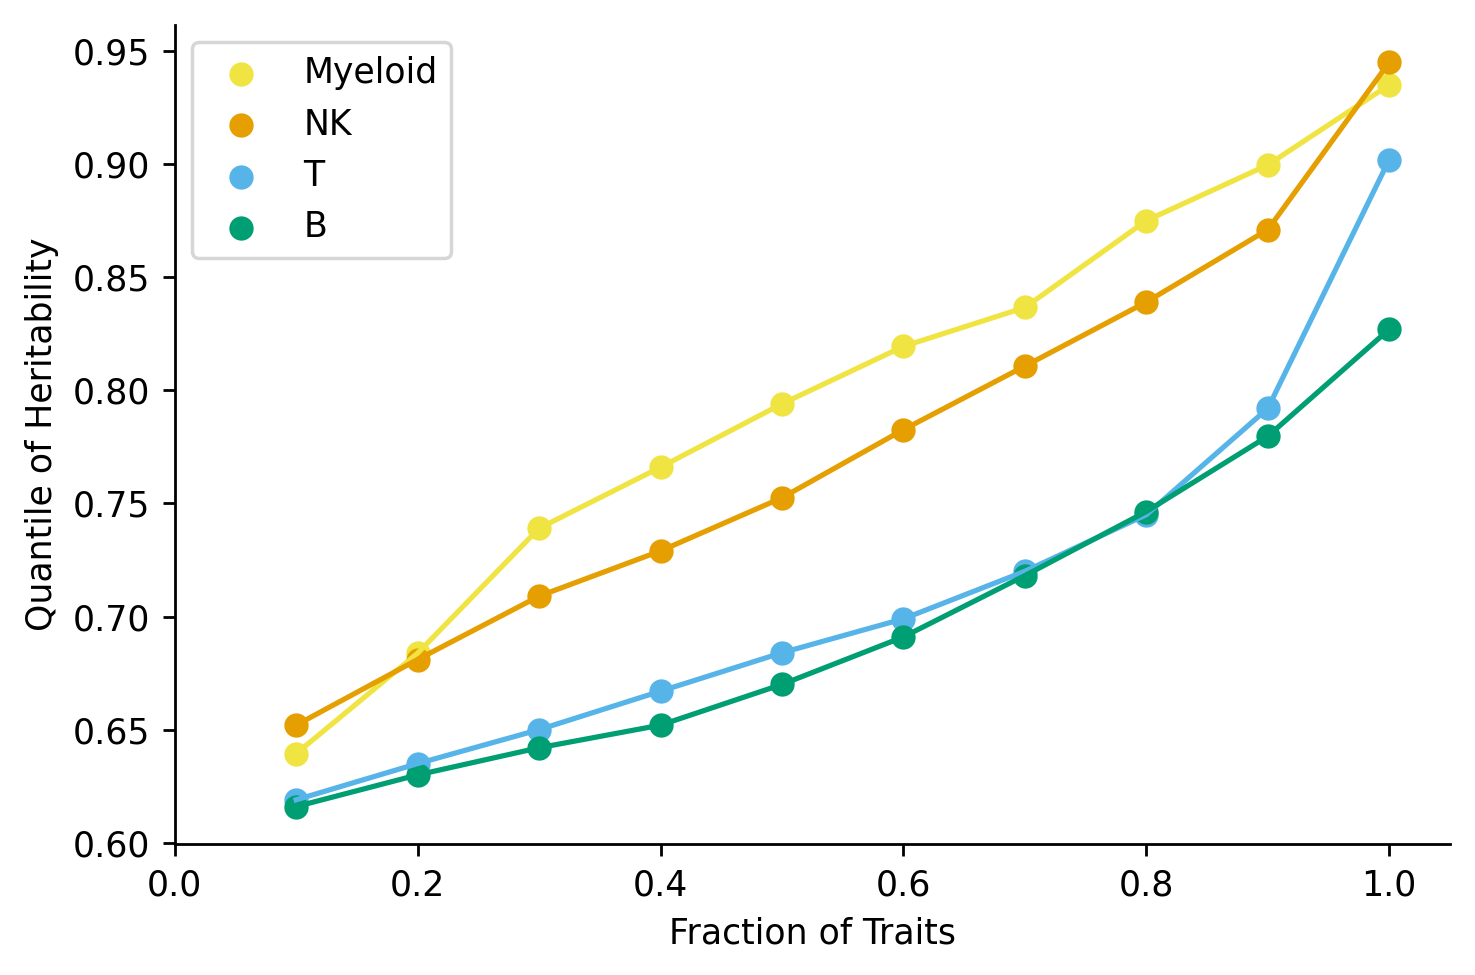

In [8]:
# Plot quantiles
fig = plt.figure(figsize=(6,4),dpi=250)
quantiles=np.arange(0.1,1.1,0.1)
plt.plot(quantiles, np.quantile(res_M.A.values, quantiles), c = color_dict['yellow'])
plt.scatter(quantiles, np.quantile(res_M.A.values, quantiles), label = "Myeloid", c = color_dict['yellow'])

plt.plot(quantiles, np.quantile(res_NK.A.values, quantiles), c = color_dict['orange'])
plt.scatter(quantiles, np.quantile(res_NK.A.values, quantiles), label = "NK", c = color_dict['orange'])

plt.plot(quantiles, np.quantile(res_T.A.values, quantiles), c = color_dict['skyblue'])
plt.scatter(quantiles, np.quantile(res_T.A.values, quantiles), label = "T", c = color_dict['skyblue'])

plt.plot(quantiles, np.quantile(res_B.A.values, quantiles), c = color_dict['green'])
plt.scatter(quantiles, np.quantile(res_B.A.values, quantiles), label = "B", c = color_dict['green'])
plt.gca().spines[['right', 'top']].set_visible(False)

plt.ylabel("Quantile of Heritability")
plt.xlabel("Fraction of Traits")
plt.legend()
plt.xlim([0,1.05])
plt.tight_layout()
plt.savefig(fig_dir+"suppfig.mangino_heritability.png")
plt.show()